In [8]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn import tree 


In [2]:
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris()  #载入数据集
# print (iris.data)

In [3]:
print (iris.target)          #输出真实标签
print (len(iris.target))     #150个样本 每个样本4个特征
print (iris.data.shape)  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150
(150, 4)


C:\Users\cwdbo\AppData\Local\Temp/ipykernel_20196/72833385.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


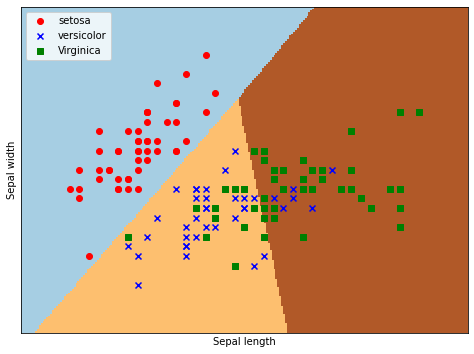

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris   
from sklearn.linear_model import LogisticRegression 
 
#载入数据集
iris = load_iris()         
X = X = iris.data[:, :2]   #获取花卉两列数据集
Y = iris.target           
 
#逻辑回归模型
lr = LogisticRegression(C=1e5)  
lr.fit(X,Y)
 
#meshgrid函数生成两个网格矩阵
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
#pcolormesh函数将xx,yy两个网格矩阵和对应的预测结果Z绘制在图片上
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
#绘制散点图
plt.scatter(X[:50,0], X[:50,1], color='red',marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:,0], X[100:,1], color='green', marker='s', label='Virginica') 
 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc=2) 
plt.show()

In [5]:

# if __name__ == '__main__':
np.random.seed(0)
# data = pd.read_csv('iris.data', header = None)  #读取数据
iris = load_iris()         
Xa = iris.data[:, :2]   #获取花卉两列数据集
Ya = iris.target  
Ya = pd.Categorical(Ya).codes  #将标签转换0,1,...

超参数： [0.18329807 0.18329807 0.18329807]
调用函数auc： 0.8884722222222222
手动计算auc： 0.8884722222222222


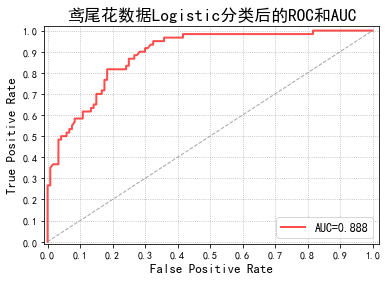

In [11]:

# data = iris.data
# iris_types = data[4].unique()
n_class = Ya.size
# x = data.iloc[:, :2]  #只取前面两个特征
# y = pd.Categorical(data[4]).codes  #将标签转换0,1,...
x_train, x_test, y_train, y_test = train_test_split(Xa, Ya, train_size = 0.6, random_state = 0)
# y_one_hot = label_binarize(y_test, np.arange(n_class))  #装换成类似二进制的编码
lb = preprocessing.LabelBinarizer()
y_one_hot=lb.fit_transform(y_test)
y_one_hot_r = y_one_hot.ravel()
alpha = np.logspace(-2, 2, 20)  #设置超参数范围
model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
model.fit(x_train, y_train)
print ('超参数：', model.C_)
# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict_proba(x_test)
y_score_r = y_score.ravel()
# 1、调用函数计算micro类型的AUC
print ('调用函数auc：', metrics.roc_auc_score(y_one_hot, y_score, average='micro'))
# 2、手动计算micro类型的AUC
#首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
print ('手动计算auc：', auc)
#绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
#FPR就是横坐标,TPR就是纵坐标
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'鸢尾花数据Logistic分类后的ROC和AUC', fontsize=17)
plt.show()